<div class="alert alert-block alert-info">
<center> <h1> STATISTICS FOR ENTERPRISE DATA ANALYSIS </h1> </center> <br>
<center> COVID-19 PROJECT 2022 </center>

**GROUP:** <br>
- João Magalhães      `20211044` <br>
- Mariana Teixeira    `20211058` <br>
- Maria Trindade      `20211049` <br>
- Nuno Bolas          `20211052` <br>

<a id='toc'></a>


**Table of Contents** <br>
* [0. Identify Business Needs](#business) -
* [1. Import](#import) -
    * [1.1. Import Libraries](#importlibraries) -
    * [1.2. Import Datasets](#importdatasets) - 
    * [1.3. Check and eliminate duplicates](#dupli) -
* [2. Initial Analysis](#initialanalysis) -
    * [2.1. Statistical Exploration](#stats) -
* [3. Definition of the initial Metric and Non-metric Features](#defeatures) -
* [4. Further Analysis](#FurtherAnalysis) -
* [5. Variables' Distribution](#VarsDistribution) -
    * [5.1. Categorical Variables - Histograms](#CatVarDist) -
    * [5.2. Numeric Variables - Histograms](#NumVarDist) -
    * [5.3. Numeric Variables - Boxplots](#NumVarBox) -


[BACK TO TOC](#toc)
    
<a id='import'></a>

# <font color = '#cc9900'> 1. Import Data </font>

<a id='import'></a>

## <font color = '#cc9900'> 1.1 Import needed libraries </font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
import seaborn as sns
import math
import random
import time
import datetime
import operator
import missingno as miss
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from scipy import stats

In [2]:
# Set the style for the Seaborn's plots
sns.set_style('darkgrid',{
    'xtick.bottom': False,
    'xtick.color': 'white',
    'xtick.direction': 'out',
    'xtick.top': False,
    'xtick.major.size': 1,
    'xtick.minor.size': 0.5,
    'ytick.left': True,
    'ytick.color': 'white',
    'ytick.direction': 'out',
    'ytick.right': False,
    'ytick.major.size': 1,
    'ytick.minor.size': 0.5,    
    'ytick.color': 'white',
    'grid.linestyle': '--',
    'axes.edgecolor': 'white',
    'grid.color': 'white'
 })

#palette = sns.color_palette("Set2") 
#sns.set_palette(palette)

<a id='import'></a>

## <font color = '#cc9900'> 1.2 Import Dataset </font>

Dataset - https://ourworldindata.org/covid-deaths <br>
Variables - https://github.com/owid/covid-19-data/blob/master/public/data/README.md <br>
Alternative - https://covid19.who.int/data

In [3]:
covid_df = pd.read_csv('owid-covid-data.csv')

In [4]:
covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
covid_df.shape

(195615, 67)

In [6]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195615 entries, 0 to 195614
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    195615 non-null  object 
 1   continent                                   184268 non-null  object 
 2   location                                    195615 non-null  object 
 3   date                                        195615 non-null  object 
 4   total_cases                                 187727 non-null  float64
 5   new_cases                                   187460 non-null  float64
 6   new_cases_smoothed                          186286 non-null  float64
 7   total_deaths                                169158 non-null  float64
 8   new_deaths                                  169129 non-null  float64
 9   new_deaths_smoothed                         167966 non-null  float64
 

In [7]:
print('Unique Countries: ' + str(len(covid_df.iso_code.unique())))
print('Unique Continents: ' + str(len(covid_df.continent.unique())))
print('Unique Variables: '+str(len(covid_df.columns)-4))
print('From: '+str(covid_df.date.min()) + ' To: '+str(covid_df.date.max()))
print('NaN Values: '+str(covid_df.isna().sum().sum()))

Unique Countries: 244
Unique Continents: 7
Unique Variables: 63
From: 2020-01-01 To: 2022-06-20
NaN Values: 5847960


In [8]:
covid_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [9]:
covid_df.describe().round(0).transpose()

,count,mean,std,min,25%,50%,75%,max
total_cases,187727.0,3435250.0,21584732.0,1.0,2849.0,36981.0,394261.0,539711953.0
new_cases,187460.0,12273.0,86644.0,0.0,0.0,69.0,1012.0,4079883.0
new_cases_smoothed,186286.0,12312.0,85062.0,0.0,7.0,99.0,1124.0,3437226.0
total_deaths,169158.0,65989.0,343352.0,1.0,98.0,952.0,8616.0,6320326.0
new_deaths,169129.0,155.0,782.0,0.0,0.0,1.0,17.0,18156.0
...,...,...,...,...,...,...,...,...
human_development_index,156834.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
excess_mortality_cumulative_absolute,6715.0,42125.0,116582.0,-37726.0,-3.0,4596.0,29387.0,1217716.0
excess_mortality_cumulative,6715.0,10.0,16.0,-28.0,-0.0,7.0,15.0,111.0
excess_mortality,6715.0,16.0,29.0,-96.0,-0.0,8.0,22.0,375.0


In [10]:
covid_df[covid_df.duplicated()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million


In [11]:
print(covid_df['location'].unique())

['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe' 'European Union' 'Faeroe Islands' 'Falkland Islands'
 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Ghana'

In [12]:
covid_df.drop(covid_df.index[covid_df['location'] == 'Africa'], inplace = True)
covid_df.drop(covid_df.index[covid_df['location'] == 'Asia'], inplace = True)
covid_df.drop(covid_df.index[covid_df['location'] == 'Europe'], inplace = True)
covid_df.drop(covid_df.index[covid_df['location'] == 'European Union'], inplace = True)
covid_df.drop(covid_df.index[covid_df['location'] == 'High income'], inplace = True)
covid_df.drop(covid_df.index[covid_df['location'] == 'International'], inplace = True)
covid_df.drop(covid_df.index[covid_df['location'] == 'Low income'], inplace = True)
covid_df.drop(covid_df.index[covid_df['location'] == 'Lower middle income'], inplace = True)
covid_df.drop(covid_df.index[covid_df['location'] == 'North America'], inplace = True)
covid_df.drop(covid_df.index[covid_df['location'] == 'Oceania'], inplace = True)
covid_df.drop(covid_df.index[covid_df['location'] == 'South America'], inplace = True)
covid_df.drop(covid_df.index[covid_df['location'] == 'Upper middle income'], inplace = True)
covid_df.drop(covid_df.index[covid_df['location'] == 'World'], inplace = True)

In [13]:
print(covid_df['continent'].unique())

['Asia' 'Europe' 'Africa' 'North America' 'South America' 'Oceania']


In [14]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184268 entries, 0 to 195614
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    184268 non-null  object 
 1   continent                                   184268 non-null  object 
 2   location                                    184268 non-null  object 
 3   date                                        184268 non-null  object 
 4   total_cases                                 176387 non-null  float64
 5   new_cases                                   176113 non-null  float64
 6   new_cases_smoothed                          175004 non-null  float64
 7   total_deaths                                158024 non-null  float64
 8   new_deaths                                  157795 non-null  float64
 9   new_deaths_smoothed                         156697 non-null  float64
 

In [15]:
covid_df['date'] = pd.to_datetime(covid_df['date'], format = '%Y-%m-%d')

In [16]:
covid_df=covid_df[covid_df['continent']=='Europe']

In [17]:
#missing values - should we eliminate any rows or consider data only from a specific (more recent) date?

covid_df.isna().sum()

iso_code                                       0
continent                                      0
location                                       0
date                                           0
total_cases                                 1089
                                           ...  
human_development_index                     6819
excess_mortality_cumulative_absolute       38567
excess_mortality_cumulative                38567
excess_mortality                           38567
excess_mortality_cumulative_per_million    38567
Length: 67, dtype: int64

In [18]:
percent_missing = covid_df.isnull().sum() * 100 / len(covid_df)
missing_value_df = pd.DataFrame({'column_name': covid_df.columns,
                                 'percent_missing': percent_missing})

In [19]:
missing_value_df.head(5)

,column_name,percent_missing
iso_code,iso_code,0.000000
continent,continent,0.000000
location,location,0.000000
date,date,0.000000
total_cases,total_cases,2.559643


Drop rows where percentage missing is greater than 75%

In [20]:
missing_value_df= missing_value_df[missing_value_df['percent_missing']>=75]
print("Indicators with more than 75% of missing data: " + str(len(missing_value_df)))
missing_value_df.head()

Indicators with more than 75% of missing data: 11


,column_name,percent_missing
weekly_icu_admissions,weekly_icu_admissions,89.100952
weekly_icu_admissions_per_million,weekly_icu_admissions_per_million,89.100952
weekly_hosp_admissions,weekly_hosp_admissions,78.547420
weekly_hosp_admissions_per_million,weekly_hosp_admissions_per_million,78.547420
total_boosters,total_boosters,79.539311


In [21]:
missing_columns=missing_value_df['column_name'].tolist()

In [22]:
covid_df_clean= covid_df.drop(missing_columns, axis=1)

covid_df_clean.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
1707,ALB,Europe,Albania,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,...,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795
1708,ALB,Europe,Albania,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,...,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795
1709,ALB,Europe,Albania,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,...,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795
1710,ALB,Europe,Albania,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,...,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795
1711,ALB,Europe,Albania,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,...,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795


In [23]:
print('Unique Countries: ' + str(len(covid_df_clean.iso_code.unique())))
print('Unique Continents: ' + str(len(covid_df_clean.continent.unique())))
print('Unique Variables: '+str(len(covid_df_clean.columns)-4))
print('From: '+str(covid_df_clean.date.min()) + ' To: '+str(covid_df_clean.date.max()))
print('NaN Values: '+str(covid_df_clean.isna().sum().sum()))

Unique Countries: 51
Unique Continents: 1
Unique Variables: 52
From: 2020-01-06 00:00:00 To: 2022-06-20 00:00:00
NaN Values: 604102


Check dates or/and countries with more than 75% missing data

In [24]:
missing_rows = covid_df_clean.isnull().sum(axis=1)/ (len(covid_df_clean.columns)-2)*100

In [25]:
covid_df_clean['MissingRows'] = missing_rows
covid_df_clean[['iso_code', 'date', 'MissingRows']].head()

,iso_code,date,MissingRows
1707,ALB,2020-02-25,59.259259
1708,ALB,2020-02-26,59.259259
1709,ALB,2020-02-27,59.259259
1710,ALB,2020-02-28,59.259259
1711,ALB,2020-02-29,59.259259


Drop values with more than 75% missing values

In [26]:
covid_df_clean = covid_df_clean[covid_df_clean['MissingRows']<=25]

In [27]:
covid_df_clean.head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,MissingRows
2027,ALB,Europe,Albania,2021-01-10,63595.0,562.0,593.857,1241.0,8.0,6.857,...,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,20.37037


In [28]:
print('Unique Countries: ' + str(len(covid_df_clean.iso_code.unique())))
print('Unique Continents: ' + str(len(covid_df_clean.continent.unique())))
print('Unique Variables: '+str(len(covid_df_clean.columns)-4))
print('From: '+str(covid_df_clean.date.min()) + ' To: '+str(covid_df_clean.date.max()))
print('NaN Values: '+str(covid_df_clean.isna().sum().sum()))

Unique Countries: 41
Unique Continents: 1
Unique Variables: 53
From: 2020-03-02 00:00:00 To: 2022-06-20 00:00:00
NaN Values: 161244


In [29]:
covid_df = covid_df_clean.drop(columns=['MissingRows'])

## Missing values imputation

<AxesSubplot:>

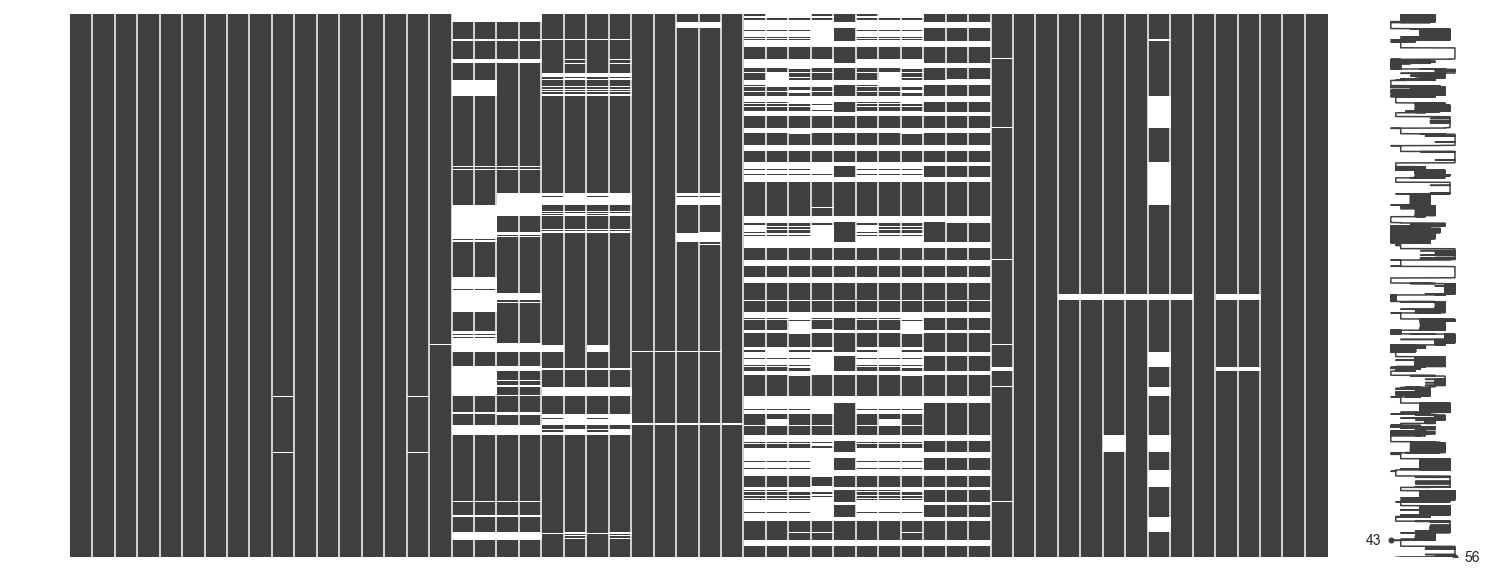

In [30]:
miss.matrix(covid_df)

In [31]:
covid_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million',
      

In [32]:
columns= ['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index']

In [33]:
covid_df[columns]=covid_df[columns].interpolate(method='linear', 
                                       limit_direction='both', 
                                       axis=0)

In [34]:
print('Unique Countries: ' + str(len(covid_df.iso_code.unique())))
print('Unique Continents: ' + str(len(covid_df.continent.unique())))
print('Unique Variables: '+str(len(covid_df.columns)-4))
print('From: '+str(covid_df.date.min()) + ' To: '+str(covid_df.date.max()))
print('NaN Values: '+str(covid_df.isna().sum().sum()))

Unique Countries: 41
Unique Continents: 1
Unique Variables: 52
From: 2020-03-02 00:00:00 To: 2022-06-20 00:00:00
NaN Values: 134


In [35]:
covid_df.isna().sum()

iso_code                                        0
continent                                       0
location                                        0
date                                            0
total_cases                                     0
new_cases                                       0
new_cases_smoothed                              0
total_deaths                                    0
new_deaths                                      0
new_deaths_smoothed                             0
total_cases_per_million                         0
new_cases_per_million                           0
new_cases_smoothed_per_million                  0
total_deaths_per_million                        0
new_deaths_per_million                          0
new_deaths_smoothed_per_million                 0
reproduction_rate                               0
icu_patients                                    0
icu_patients_per_million                        0
hosp_patients                                   0


In [36]:
covid_df.drop(['tests_units'], inplace = True, axis = 1)

<AxesSubplot:>

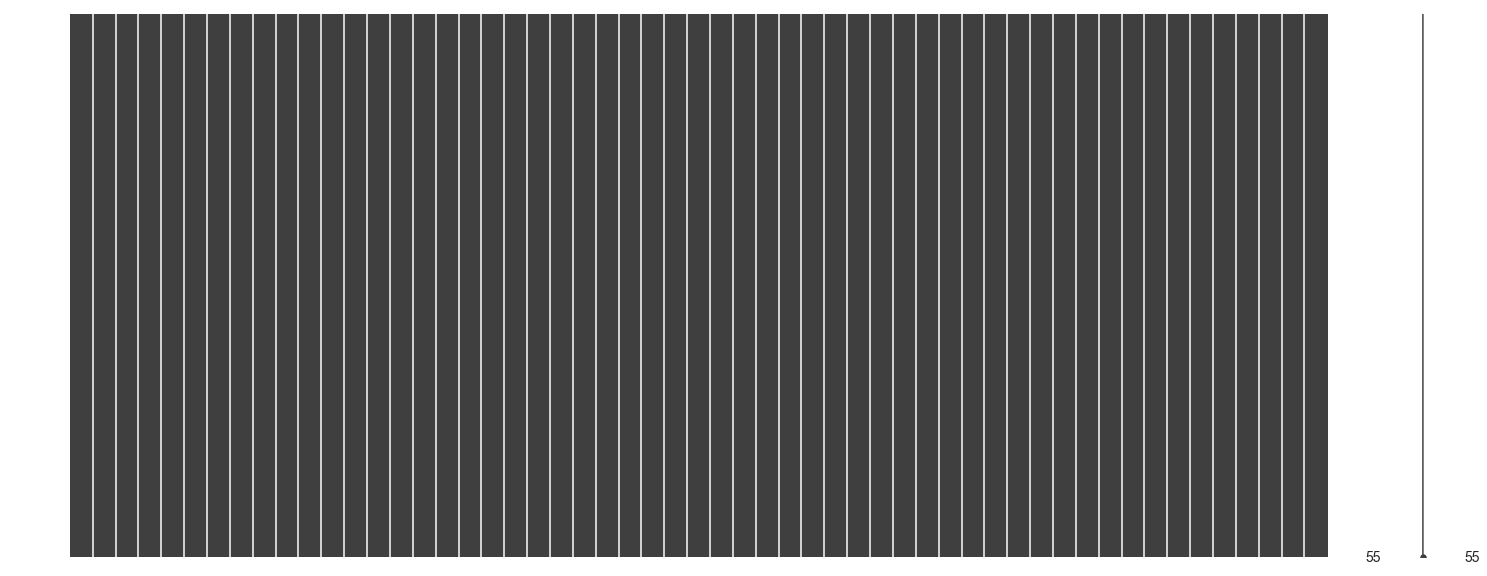

In [37]:
miss.matrix(covid_df)

In [38]:
#drop variables not interesting

In [39]:
covid_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_va

In [40]:
covid_df.drop(["new_cases_smoothed", "new_deaths_smoothed", "total_cases_per_million", "new_cases_per_million", "new_cases_smoothed_per_million", "total_deaths_per_million", "new_deaths_per_million", "new_deaths_smoothed_per_million", "reproduction_rate", "icu_patients", "icu_patients_per_million", "hosp_patients", "hosp_patients_per_million", "total_tests_per_thousand", "new_tests_per_thousand", "new_tests_smoothed", "new_tests_smoothed_per_thousand", "positive_rate", "tests_per_case", "total_vaccinations", "new_vaccinations_smoothed", "total_vaccinations_per_hundred", "people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred", "new_vaccinations_smoothed_per_million", "new_people_vaccinated_smoothed", "new_people_vaccinated_smoothed_per_hundred", "stringency_index", "population_density","female_smokers", "male_smokers",  "hospital_beds_per_thousand"], inplace = True, axis = 1)

In [41]:
covid_df

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,...,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,human_development_index
2027,ALB,Europe,Albania,2021-01-10,63595.0,562.0,1241.0,8.0,276420.0,2997.0,...,2872934.0,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,78.57,0.795
2028,ALB,Europe,Albania,2021-01-11,63971.0,376.0,1247.0,6.0,277995.0,1575.0,...,2872934.0,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,78.57,0.795
2029,ALB,Europe,Albania,2021-01-12,64627.0,656.0,1252.0,5.0,281722.0,3727.0,...,2872934.0,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,78.57,0.795
2030,ALB,Europe,Albania,2021-01-13,65334.0,707.0,1256.0,4.0,285029.0,3307.0,...,2872934.0,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,78.57,0.795
2031,ALB,Europe,Albania,2021-01-14,65994.0,660.0,1261.0,5.0,288724.0,3695.0,...,2872934.0,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,78.57,0.795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184291,GBR,Europe,United Kingdom,2022-06-08,22439681.0,14055.0,179259.0,85.0,503270347.0,245960.0,...,68207114.0,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,81.32,0.932
184292,GBR,Europe,United Kingdom,2022-06-09,22449760.0,10079.0,179341.0,82.0,503270347.0,245960.0,...,68207114.0,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,81.32,0.932
184293,GBR,Europe,United Kingdom,2022-06-10,22459358.0,9598.0,179393.0,52.0,503270347.0,245960.0,...,68207114.0,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,81.32,0.932
184294,GBR,Europe,United Kingdom,2022-06-11,22459358.0,0.0,179393.0,0.0,503270347.0,245960.0,...,68207114.0,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,81.32,0.932


In [42]:
covid_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_tests', 'new_tests',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'population', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'life_expectancy', 'human_development_index'],
      dtype='object')

In [43]:
country_table = pd.pivot_table(covid_df, values = ["total_cases", "total_deaths", "people_fully_vaccinated", "population"], index = "location", aggfunc = max)

In [44]:
#Adding mortality rate and vaccination rate

country_table['mortality_rate'] = country_table['total_deaths']*100 / country_table['total_cases']
country_table['vaccination_rate'] = country_table['people_fully_vaccinated']*100 / country_table['population']

In [45]:
country_table = country_table.sort_values(by = "total_cases", ascending = False)

In [46]:
country_table.style.background_gradient(cmap = "cubehelix")

,people_fully_vaccinated,population,total_cases,total_deaths,mortality_rate,vaccination_rate
location,,,,,,
France,52873203.000000,67422000.000000,30139875.000000,149108.000000,0.494720,78.421291
Germany,64538292.000000,83900471.000000,27211896.000000,140176.000000,0.515128,76.922443
United Kingdom,50069860.000000,68207114.000000,22459358.000000,179393.000000,0.798745,73.408560
Russia,74003641.000000,145912022.000000,18108285.000000,372338.000000,2.056175,50.717987
Italy,47944071.000000,60367471.000000,17896065.000000,167780.000000,0.937525,79.420374
Spain,40539246.000000,46745211.000000,12515127.000000,107239.000000,0.856875,86.723849
Netherlands,11980109.000000,17173094.000000,8132678.000000,22429.000000,0.275789,69.760924
Poland,22505139.000000,37797000.000000,6009479.000000,116368.000000,1.936407,59.542130
Ukraine,15142679.000000,43466822.000000,4943428.000000,111423.000000,2.253962,34.837327


In [47]:
country_table = country_table.sort_values(by = "vaccination_rate", ascending = False)

In [48]:
country_table.style.background_gradient(cmap = "cubehelix")

,people_fully_vaccinated,population,total_cases,total_deaths,mortality_rate,vaccination_rate
location,,,,,,
Latvia,47763149.981132,1866934.000000,830698.000000,5839.000000,0.702903,2558.373782
Iceland,5655526.173913,368792.000000,190014.000000,153.000000,0.080520,1533.527347
Serbia,73768860.123810,6871547.000000,2020952.000000,16103.000000,0.796803,1073.540793
Greece,61311377.500000,10370747.000000,3549944.000000,30099.000000,0.847873,591.195384
North Macedonia,9665996.677419,2082661.000000,311199.000000,9297.000000,2.987477,464.117621
Sweden,40328104.473958,10160159.000000,2510930.000000,19049.000000,0.758643,396.923950
Estonia,4778365.093863,1325188.000000,578494.000000,2586.000000,0.447023,360.580166
Luxembourg,1870200.495082,634814.000000,251873.000000,1084.000000,0.430376,294.606057
Bosnia and Herzegovina,8931553.142857,3263459.000000,295240.000000,13547.000000,4.588470,273.683633


In [49]:
top_10_total_cases = covid_df.groupby(by = "location").max()[['total_cases', 'date']].sort_values(by = ['total_cases'], ascending = False).reset_index()

Text(0, 0.5, 'Total Cases')

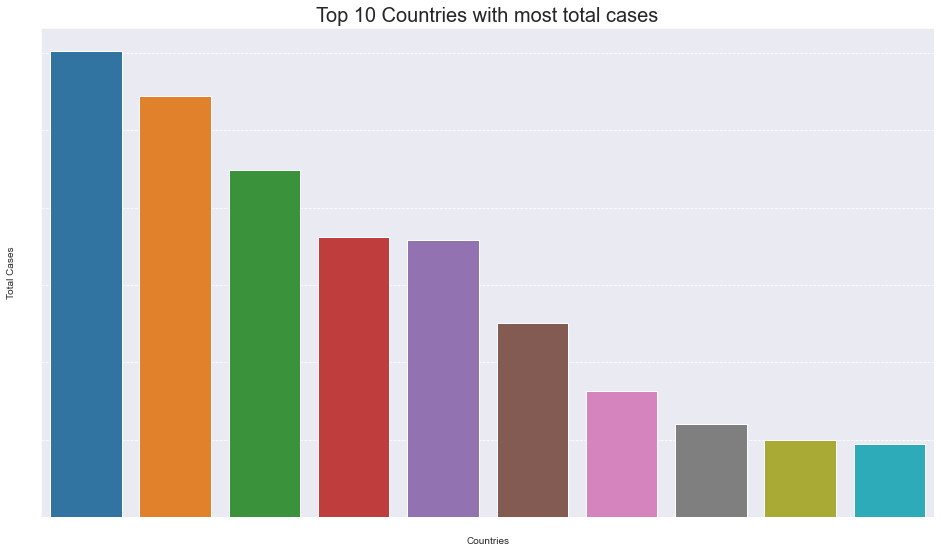

In [50]:
#Top 10 Countries with most total cases

fig = plt.figure(figsize=(16,9))
plt.title("Top 10 Countries with most total cases", size = 20)
ax = sns.barplot(data = top_10_total_cases.iloc[:10], y = "total_cases", x = "location")
plt.xlabel("Countries")
plt.ylabel("Total Cases")

In [51]:
top_10_total_deaths = covid_df.groupby(by = "location").max()[['total_deaths', 'date']].sort_values(by = ['total_deaths'], ascending = False).reset_index()

Text(0, 0.5, 'Total Deaths')

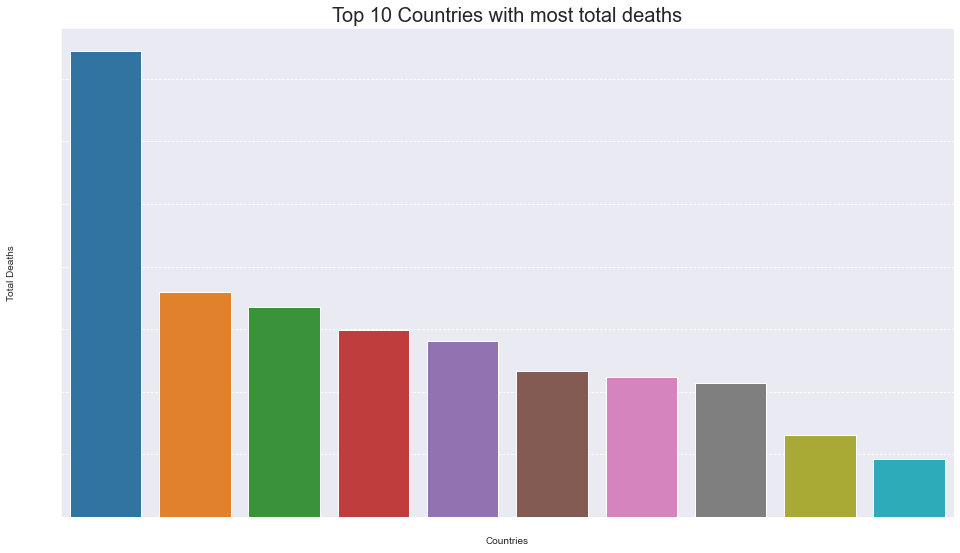

In [52]:
#Top 10 Countries with most total deaths

fig = plt.figure(figsize=(16,9))
plt.title("Top 10 Countries with most total deaths", size = 20)
ax = sns.barplot(data = top_10_total_deaths.iloc[:10], y = "total_deaths", x = "location")
plt.xlabel("Countries")
plt.ylabel("Total Deaths")

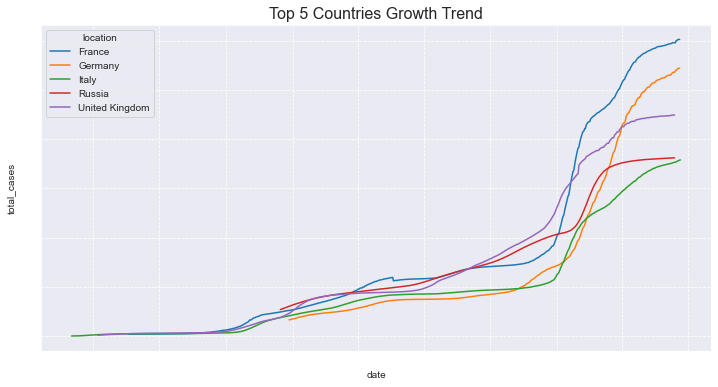

In [53]:
#Growth trend

fig = plt.figure(figsize = (12,6))

ax = sns.lineplot(data = covid_df[covid_df['location'].isin(['Russia', 'United Kingdom', 'Italy', 'France', 'Germany'])],x = 'date', y = 'total_cases', hue = 'location')
ax.set_title("Top 5 Countries Growth Trend", size=16)

plt.savefig('analysis.png', transparent=True)

## Correlation

In [54]:
covid_df_corr=covid_df.corr()

In [55]:
#covid_df_corr

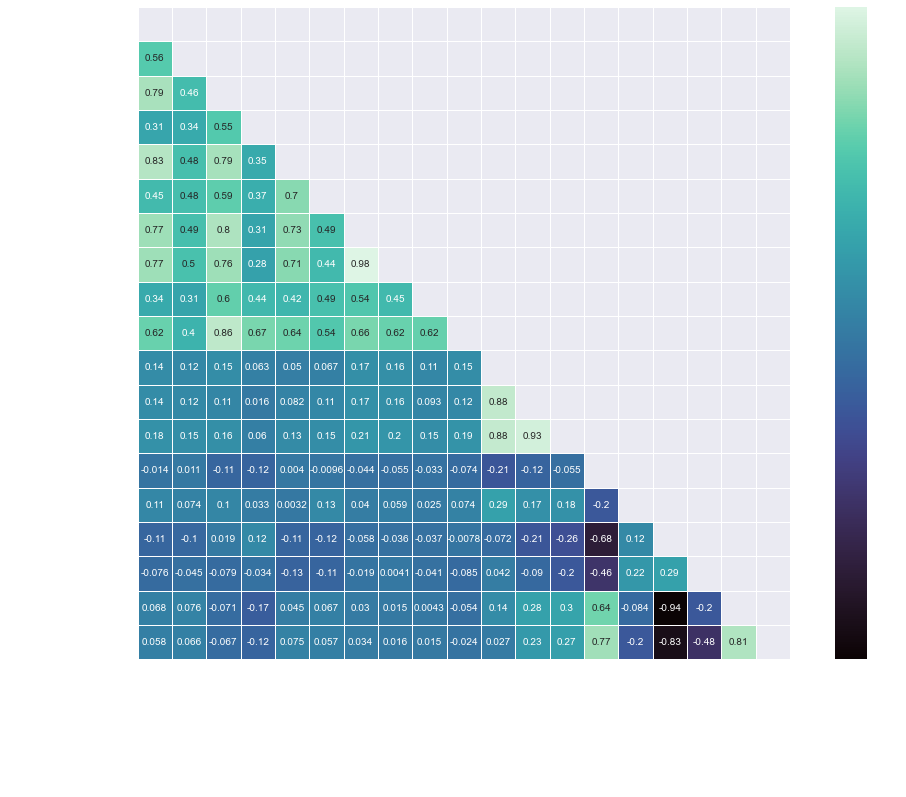

In [56]:
# mask out the upper triangular for drawing
mask = np.triu(np.ones_like(covid_df_corr, dtype=bool)) # only look at the diagonals

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Draw a heatmap with the numeric values in each cell

sns.heatmap(covid_df_corr,
            mask=mask,
            annot=True,  
            linewidths=.5, 
            square=True,
            ax=ax,
            cmap = 'mako')


plt.savefig('demo.png', transparent=True)

In [57]:
#pip install pingouin 
import pingouin as pg

/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


### Partial Correlation

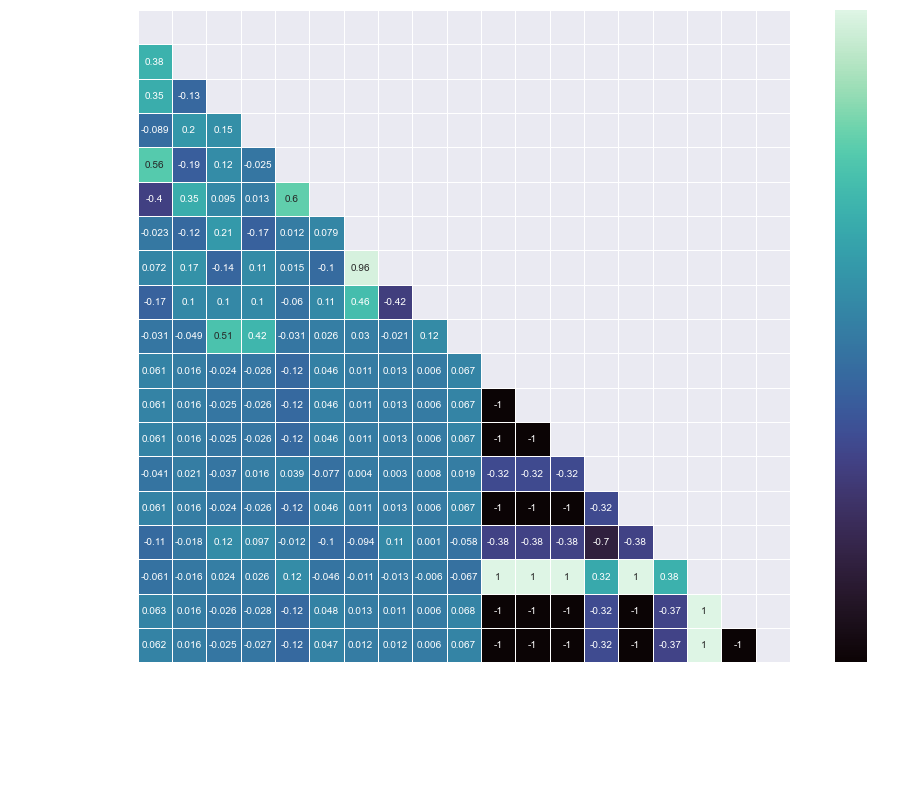

In [58]:
figsize=(16, 12)

partial_corr = covid_df.pcorr().round(3)

# mask out the upper triangular for drawing
mask = np.triu(np.ones_like(partial_corr.corr(method="pearson"), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Draw a heatmap with the numeric values in each cell

sns.heatmap(partial_corr,
            mask=mask,
            annot=True,  
            linewidths=.5, 
            square=True,
            ax=ax,
            cmap = 'mako')


plt.savefig('partcorr.png', transparent=True)

In [59]:
covid_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_tests', 'new_tests',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'population', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'life_expectancy', 'human_development_index'],
      dtype='object')

In [60]:
num_columns=['total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_tests', 'new_tests',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'population', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'life_expectancy', 'human_development_index']

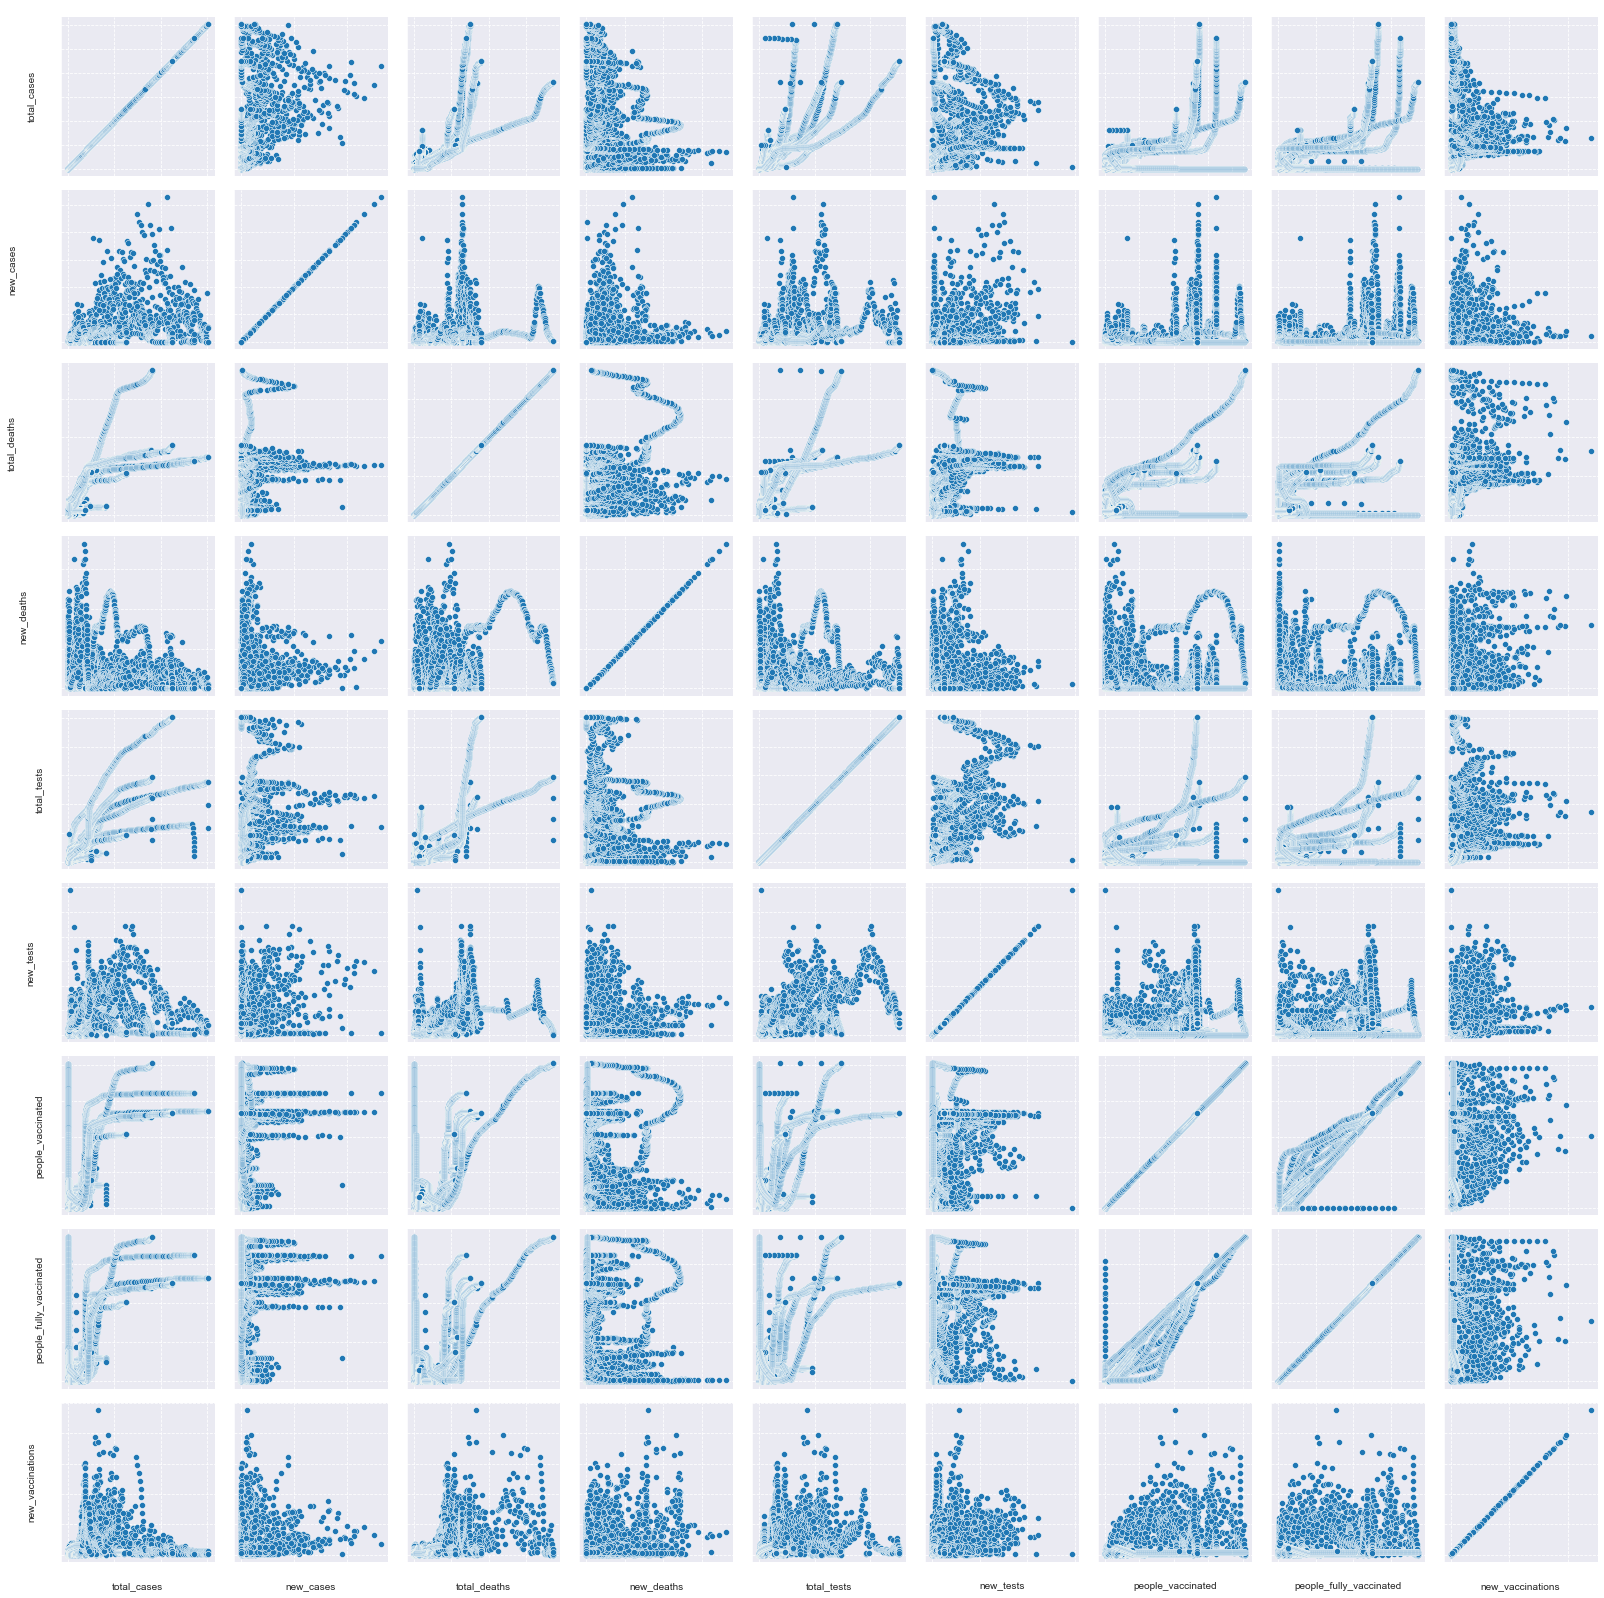

In [61]:
compare_variables=['total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_tests', 'new_tests',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations']



g = sns.PairGrid(covid_df[compare_variables])
g.map(sns.scatterplot)

plt.savefig('comparevars.png', transparent=True)

## Histograms

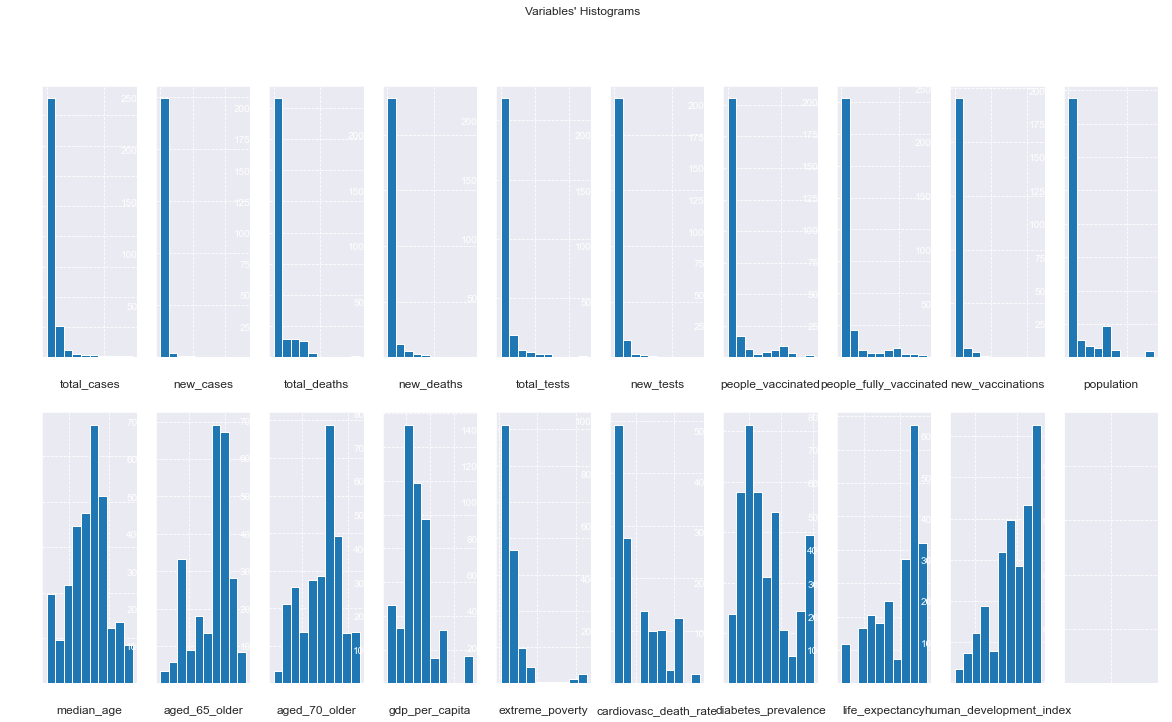

In [62]:
fig, axes = plt.subplots(2, math.ceil(len(num_columns) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), num_columns): 
    ax.hist(covid_df[feat])
    ax.set_title(feat, y=-0.13)
    
title = "Variables' Histograms"

plt.suptitle(title)

plt.show()

## Boxplots

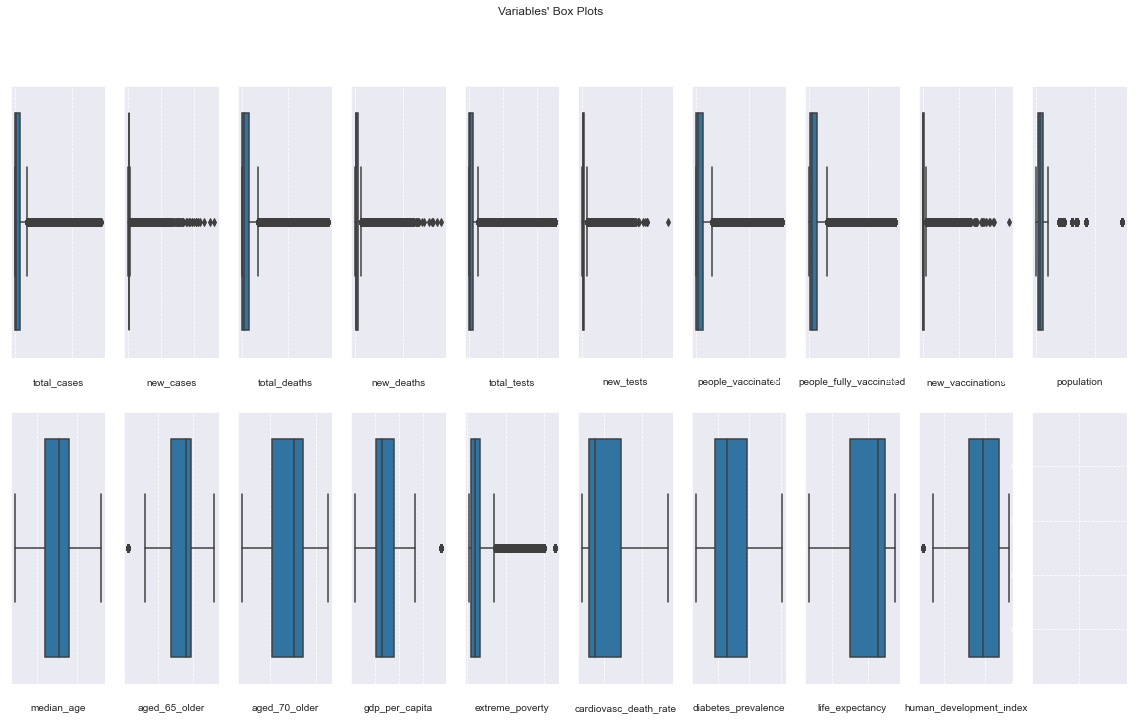

<Figure size 432x288 with 0 Axes>

In [63]:
fig, axes = plt.subplots(2, math.ceil(len(num_columns) / 2), figsize=(20, 11))


for ax, feat in zip(axes.flatten(), num_columns): 
    sns.boxplot(x = covid_df[feat], ax=ax)
    
title = "Variables' Box Plots"

plt.suptitle(title)

plt.show()

plt.savefig('boxplots.png', transparent=True)

## Outliers Removal

In [64]:
#IQR

In [65]:
q25 = covid_df.quantile(.25)
q75 = covid_df.quantile(.75)
iqr = (q75 - q25)



upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr



filters2 = []
for metric in num_columns:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(covid_df[metric].between(llim, ulim, inclusive=True))


filters2 = pd.Series(np.all(filters2, 0), index=covid_df.index)
df_2 = covid_df[filters2]
print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / covid_df.shape[0], 4))

Percentage of data kept after removing outliers: 0.5739


/var/folders/89/gv90tkm505qglgm9s_mrxwxw0000gn/T/ipykernel_78874/3102049167.py:16: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  filters2.append(covid_df[metric].between(llim, ulim, inclusive=True))


too high to drop - define strategy to include outliers in linear regression. maybe use Least Absolute Deviation?
https://towardsdatascience.com/stop-dropping-outliers-3-upgrades-that-prepare-your-linear-regression-for-the-real-world-37693a5fc0bb

## Standardization

In [66]:
scaled_covid_df = StandardScaler().fit(covid_df[num_columns])
covid_df[num_columns] = scaled_covid_df.transform(covid_df[num_columns])

In [67]:
covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,...,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,human_development_index
2027,ALB,Europe,Albania,2021-01-10,-0.456728,-0.284529,-0.546692,-0.360214,-0.448291,-0.444215,...,-0.549645,-1.779554,-1.964036,-1.625742,-1.439268,0.306684,0.820804,1.981863,-0.457118,-1.915578
2028,ALB,Europe,Albania,2021-01-11,-0.456626,-0.292316,-0.546562,-0.373947,-0.448265,-0.451667,...,-0.549645,-1.779554,-1.964036,-1.625742,-1.439268,0.306684,0.820804,1.981863,-0.457118,-1.915578
2029,ALB,Europe,Albania,2021-01-12,-0.456448,-0.280593,-0.546454,-0.380814,-0.448205,-0.440389,...,-0.549645,-1.779554,-1.964036,-1.625742,-1.439268,0.306684,0.820804,1.981863,-0.457118,-1.915578
2030,ALB,Europe,Albania,2021-01-13,-0.456256,-0.278458,-0.546368,-0.387680,-0.448151,-0.442590,...,-0.549645,-1.779554,-1.964036,-1.625742,-1.439268,0.306684,0.820804,1.981863,-0.457118,-1.915578
2031,ALB,Europe,Albania,2021-01-14,-0.456077,-0.280426,-0.546260,-0.380814,-0.448091,-0.440557,...,-0.549645,-1.779554,-1.964036,-1.625742,-1.439268,0.306684,0.820804,1.981863,-0.457118,-1.915578


### Minmax for chi-square

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
scaler2 = MinMaxScaler()
covid_df_minmax = covid_df.copy().select_dtypes(include='number')

In [70]:
covid_df_minmax[:] = scaler2.fit_transform(covid_df_minmax[:])
covid_df_minmax.head()

,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,people_vaccinated,people_fully_vaccinated,new_vaccinations,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,human_development_index
2027,0.002106,0.001065,0.003330,0.004396,0.000544,0.001010,0.000000e+00,0.0,0.000025,0.019432,0.066038,0.191166,0.181799,0.074235,0.178571,0.480697,1.0,0.561448,0.217391
2028,0.002118,0.000713,0.003346,0.003297,0.000548,0.000528,7.890440e-07,0.0,0.000025,0.019432,0.066038,0.191166,0.181799,0.074235,0.178571,0.480697,1.0,0.561448,0.217391
2029,0.002140,0.001244,0.003360,0.002747,0.000555,0.001258,1.578088e-06,0.0,0.000025,0.019432,0.066038,0.191166,0.181799,0.074235,0.178571,0.480697,1.0,0.561448,0.217391
2030,0.002163,0.001340,0.003371,0.002198,0.000562,0.001115,2.317817e-06,0.0,0.000025,0.019432,0.066038,0.191166,0.181799,0.074235,0.178571,0.480697,1.0,0.561448,0.217391
2031,0.002185,0.001251,0.003384,0.002747,0.000569,0.001247,3.279464e-06,0.0,0.000033,0.019432,0.066038,0.191166,0.181799,0.074235,0.178571,0.480697,1.0,0.561448,0.217391


# Prepare Data for Linear Regression Model

## Multicollinearity

https://towardsdatascience.com/how-to-remove-multicollinearity-using-python-4da8d9d8abb2 <br>
Rule of thumb is if we have VIF>10, the model has high multilinearity.

In [71]:
covid_df.columns[4:]

Index(['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_tests',
       'new_tests', 'people_vaccinated', 'people_fully_vaccinated',
       'new_vaccinations', 'population', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'life_expectancy',
       'human_development_index'],
      dtype='object')

In [72]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = covid_df[list(covid_df.columns[4:])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
6,57.180203,people_vaccinated
7,47.658229,people_fully_vaccinated
12,12.058088,aged_70_older
17,10.427315,life_expectancy
15,10.241181,cardiovasc_death_rate
11,10.159237,aged_65_older
2,9.774197,total_deaths
10,7.523477,median_age
4,6.647334,total_tests
18,6.523979,human_development_index


In [73]:
# import plotly.graph_objects as go
# import pandas as pd

# def plot_map_indicator(dataframe, indicator_name):
#     col = indicator_name
#     df_data = dataframe[['location','iso_code','date', col]]
#     df = df_data.groupby(['location', 'iso_code']).mean().round(1).reset_index()

#     fig = go.Figure(data = go.Choropleth(

#     locations = df['location'], 
#     z = df[col], #aqui define a cor da legenda 
#     text = df['location'],
#     legendgroup = True,
#     showscale = True,   
#     colorscale = 'Viridis', 
#     autocolorscale = False, 
#     reversescale = True, 
#     marker_line_color = 'darkgray', 
#     marker_line_width = 0.5, 
#     colorbar_tickprefix = '', 
#     colorbar_title = ''))

#     fig.update_layout(
#     title = dict(
#         text = col, 
#         x = 0.55, 
#         y = 0.95
#     ),
#     legend = dict(
#         orientation = 'v'
#     ),
    
#     geo=dict(
#     showframe = False, 
#         showcoastlines=False, 
#         projection_type = 'equirectangular'
#     ), 
#     annotations = [dict(
#         x=0.55, y=0.001, xref = 'paper', yref='paper', text='Source:<a href="https://sdg-tracker.org"> Our World in Data </a>',
#         showarrow = False
#     )]
#     )

#     fig.show()

In [74]:
# indicador = 'total_deaths'
# plot_map_indicator(covid_df, indicador)

# Dummy Variables 

In [75]:
covid_dummy = pd.get_dummies(covid_df, drop_first = True)

In [76]:
covid_dummy.drop(columns = ['date'],inplace = True)

# K-means

In [77]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [78]:
kmeans_kwargs = {
   ...:     "init": "random",
   ...:     "n_init": 10,
   ...:     "max_iter": 300,
   ...:     "random_state": 42,
   ...: }
   ...:
   ...: # A list holds the SSE values for each k
   ...: sse = []
   ...: for k in range(1, 11):
   ...:     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   ...:     kmeans.fit(covid_dummy)
   ...:     sse.append(kmeans.inertia_)

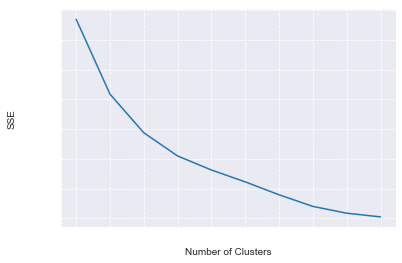

In [79]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [80]:
#silhouette_coefficients = []
#   ...:
#   ...: # Notice you start at 2 clusters for silhouette coefficient
#   ...: for k in range(2, 11):
#   ...:     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
#   ...:     kmeans.fit(covid_dummy)
#   ...:     score = silhouette_score(covid_dummy, kmeans.labels_)
#   ...:     silhouette_coefficients.append(score)

In [81]:
#   ...: plt.plot(range(2, 11), silhouette_coefficients)
#   ...: plt.xticks(range(2, 11))
#   ...: plt.xlabel("Number of Clusters")
#   ...: plt.ylabel("Silhouette Coefficient")
#   ...: plt.show()

In [82]:
kmeans = KMeans( init="random",n_clusters=5,n_init=10,max_iter=300,random_state=5)

In [83]:
kmeans.fit(covid_dummy)

KMeans(init='random', n_clusters=5, random_state=5)

In [84]:
kmeans.inertia_

280722.4472789263

In [85]:
kmeans.cluster_centers_

array([[-1.76999929e-01, -8.74986632e-02, -2.14642073e-01,
        -5.50813172e-02, -1.47880676e-01, -7.15901653e-02,
        -2.34930613e-01, -2.32381342e-01, -1.82826186e-01,
        -8.51555054e-02,  4.45072726e-01,  5.64621335e-01,
         5.01092991e-01,  1.80802933e-01, -4.52651465e-02,
        -5.87703318e-01,  2.43177504e-03,  6.39088157e-01,
         5.40761974e-01,  9.31792769e-04,  7.41707044e-02,
         7.68729035e-02,  5.89805982e-16, -7.11236625e-17,
         8.37004077e-17,  6.94185613e-02, -2.42861287e-16,
         6.74617965e-02,  1.09951547e-02,  7.65933656e-02,
         3.82966828e-02, -3.88578059e-16,  6.56913902e-02,
         2.94446515e-02,  2.63697354e-02,  5.02236303e-02,
         5.62050406e-16,  5.86336535e-16,  9.08995101e-16,
        -1.45716772e-16,  3.87625792e-02,  2.53447633e-02,
        -2.25514052e-16,  5.82867088e-16, -6.83481050e-16,
        -3.43475248e-16,  2.08166817e-17,  6.43868804e-02,
         6.79276929e-02,  6.03683770e-16, -5.86336535e-1

In [86]:
 kmeans.n_iter_

9

In [87]:
 kmeans.labels_[:5]

array([3, 3, 3, 3, 3], dtype=int32)

In [88]:
covid_dummy['true_label'] = kmeans.labels_

In [89]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets import make_moons

In [90]:
# dbscan = DBSCAN(eps=0.3)
#   ...:
#   ...: # Fit the algorithms to the features
#   ...: kmeans.fit(covid_dummy)
#   ...: dbscan.fit(covid_dummy)
#   ...:
#   ...: # Compute the silhouette scores for each algorithm
##   ...:     covid_dummy, kmeans.labels_
#   ...: ).round(2)
#   ...: dbscan_silhouette = silhouette_score(
#   ...:    covid_dummy, dbscan.labels_
#   ...: ).round (2)

In [91]:
#kmeans_silhouette

In [92]:
# dbscan_silhouette

Kmeans silhouette > DBSCAN silhouette so it should be fine.

In [93]:
covid_dummy['true_label'].value_counts()

0    10732
1     4506
3     4338
2     3594
4     2387
Name: true_label, dtype: int64

In [94]:
covid_dummy[['total_cases','total_deaths','true_label']].groupby(['true_label']).mean().transpose()

true_label,0,1,2,3,4
total_cases,-0.177000,-0.369356,-0.416741,-0.120621,2.339717
total_deaths,-0.214642,-0.382298,-0.544538,0.003074,2.501010


In [95]:
prediction = covid_dummy[['total_cases','total_deaths']]

In [96]:
label = kmeans.fit_predict(prediction)

### Kmeans with PCA

In [97]:
from sklearn.decomposition import PCA

pca = PCA(2)
df = pca.fit_transform(covid_dummy)
kmeans = KMeans(n_clusters= 5)
label = kmeans.fit_predict(df)
print(label)

[4 4 4 ... 2 2 2]


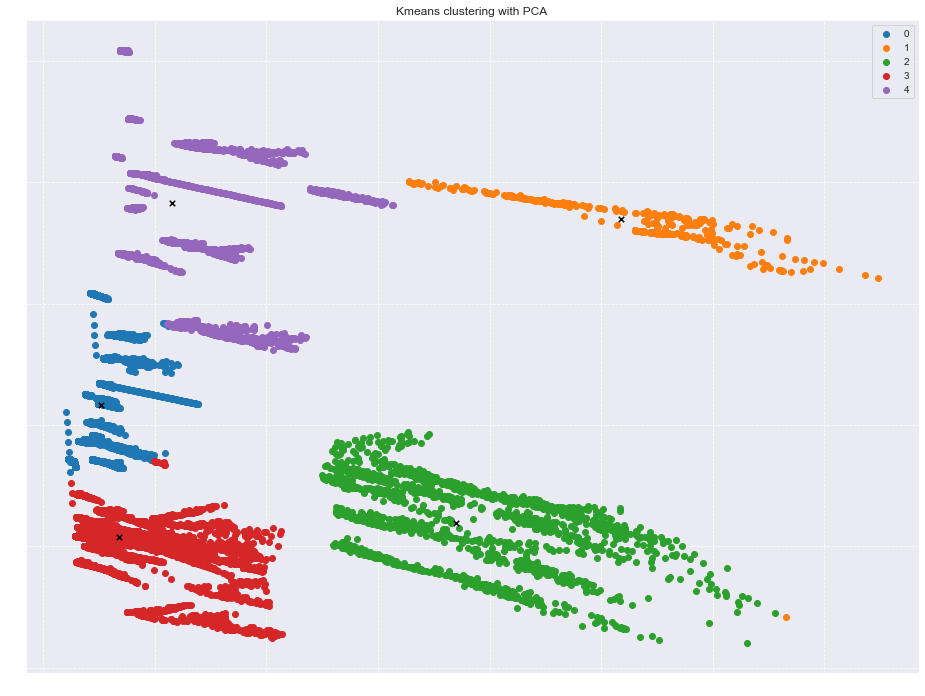

<Figure size 432x288 with 0 Axes>

In [98]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
f, ax = plt.subplots(figsize=(16, 12))

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 30, color = 'black',marker='x')
plt.title('Kmeans clustering with PCA')
plt.legend()
plt.show()

plt.savefig('kmeans.png', transparent=True)

In [99]:
len(label)

25557

In [100]:
covid_pca = covid_df.copy()

In [101]:
covid_pca['label'] = label

In [102]:
covid_pca[['location','label']]

,location,label
2027,Albania,4
2028,Albania,4
2029,Albania,4
2030,Albania,4
2031,Albania,4
...,...,...
184291,United Kingdom,2
184292,United Kingdom,2
184293,United Kingdom,2
184294,United Kingdom,2


In [103]:
df_pca = covid_pca[['location','label']]

In [104]:
label_per_country = df_pca.groupby('location').mean()

In [105]:
label_per_country['True_label'] = df_pca.groupby('location').mean().round(0)

In [106]:
df_pca.groupby('location').mean().round(0).value_counts()

label
0.0      14
3.0      11
4.0      10
2.0       5
1.0       1
dtype: int64

#### PCA components

In [107]:
pca_y = pca.fit(covid_dummy)

In [108]:
pd.DataFrame(
    {"Eigenvalue": pca_y.explained_variance_,
     "Difference": np.insert(np.diff(pca_y.explained_variance_), 0, 0),
     "Proportion": pca_y.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca_y.explained_variance_ratio_)},
    index=range(1, pca_y.n_components_ + 1)
)

,Eigenvalue,Difference,Proportion,Cumulative
1,6.967459,0.000000,0.304552,0.304552
2,4.474103,-2.493356,0.195566,0.500117


In [109]:
pca_y_feat_names = ['Component_1','Component_2']

In [110]:
loadings= pd.DataFrame(pca_y.components_.T, columns=pca_y_feat_names, index=covid_dummy.columns)

In [111]:
loadings

,Component_1,Component_2
total_cases,0.315519,-0.069306
new_cases,0.228544,-0.074244
total_deaths,0.352409,-0.020082
new_deaths,0.206739,0.025703
total_tests,0.318757,-0.065035
...,...,...
location_Sweden,-0.004132,-0.012783
location_Switzerland,-0.005873,-0.015126
location_Ukraine,0.003071,0.014327
location_United Kingdom,0.023491,-0.009117


In [112]:
loadings_y= pca_y.components_.T*np.sqrt(pca_y.explained_variance_)
loading_matrix_y= pd.DataFrame(loadings_y, columns=pca_y_feat_names, index=covid_dummy.columns)
loading_matrix_y.head(19).index

Index(['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_tests',
       'new_tests', 'people_vaccinated', 'people_fully_vaccinated',
       'new_vaccinations', 'population', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'life_expectancy',
       'human_development_index'],
      dtype='object')

In [113]:
loading_matrix_y = loading_matrix_y.T[['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_tests',
       'new_tests', 'people_vaccinated', 'people_fully_vaccinated',
       'new_vaccinations', 'population', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'life_expectancy',
       'human_development_index']].T

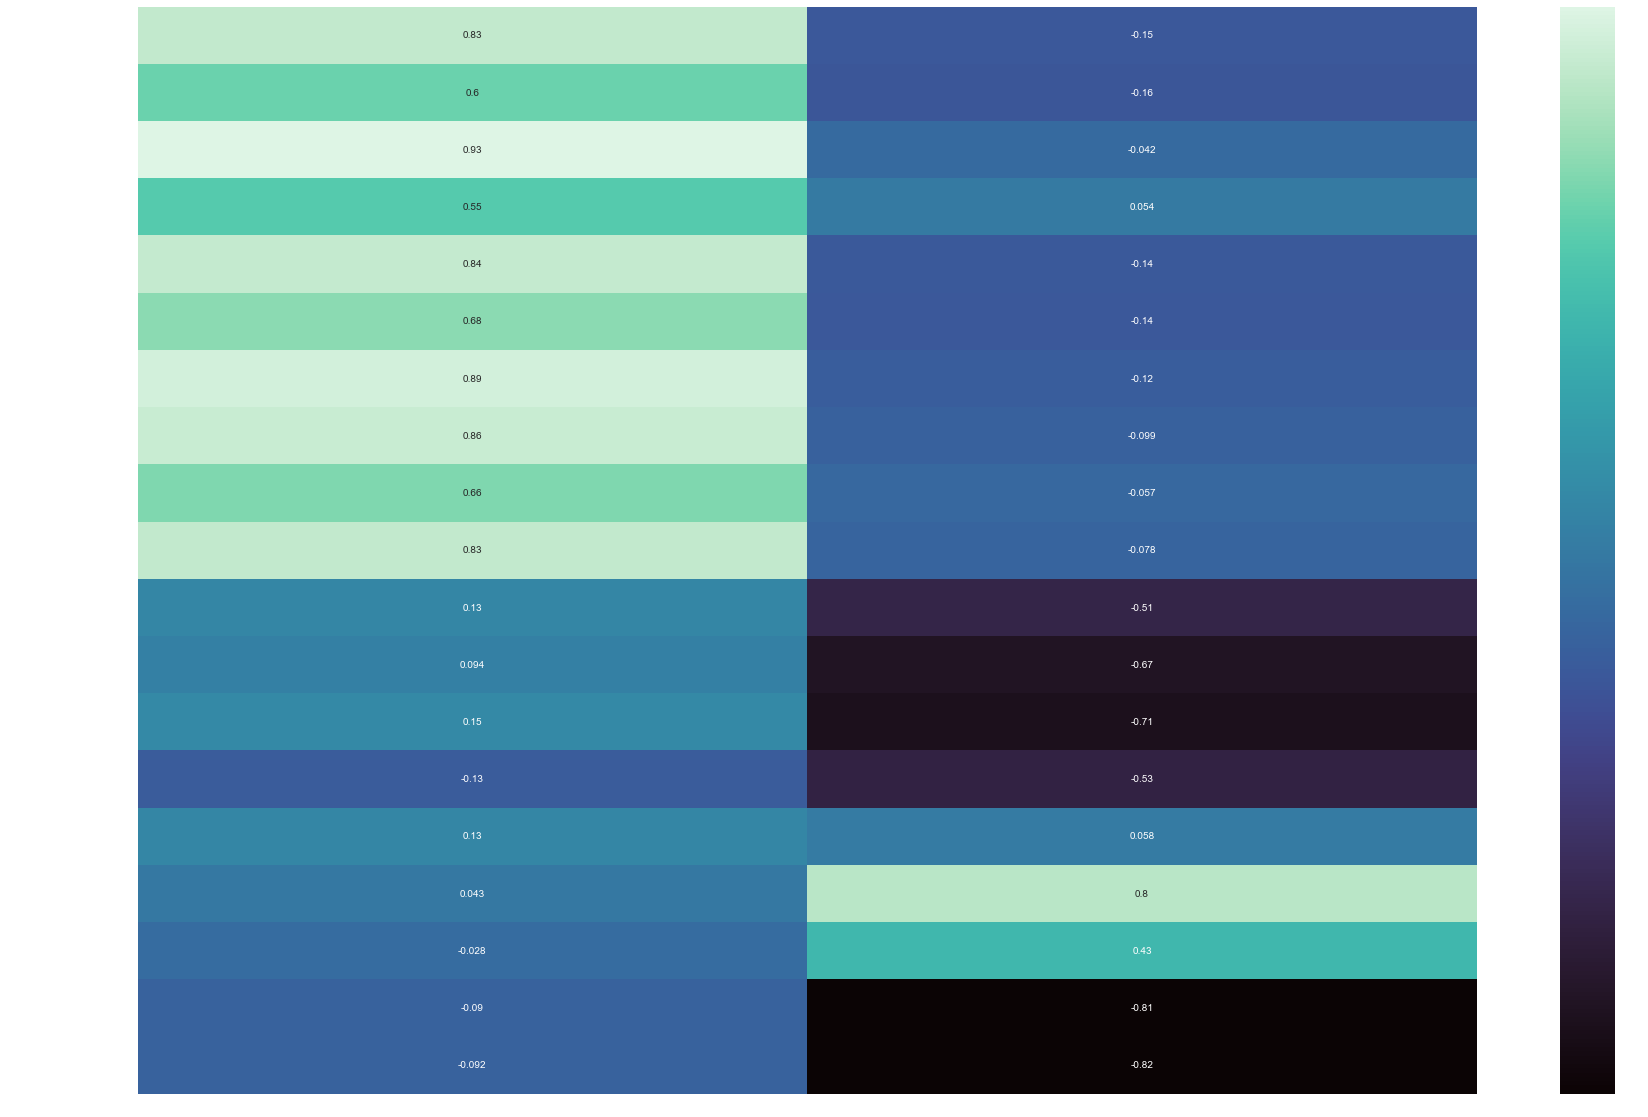

In [114]:
f, ax = plt.subplots(figsize=(30, 20))
ax = sns.heatmap(loading_matrix_y, annot=True, cmap = 'mako')
plt.show()

### Total deaths per Cluster 

In [115]:
covid_pca[['total_deaths','total_cases','population','people_vaccinated','label']].groupby('label').mean()

,total_deaths,total_cases,population,people_vaccinated
label,,,,
0,-0.436343,-0.370456,-0.513275,-0.398971
1,4.942364,2.369234,4.561801,3.330489
2,2.110725,2.334999,1.738040,2.494035
3,-0.189093,-0.158682,-0.011341,-0.198975
4,0.002798,-0.120695,0.011272,-0.120657


# Feature Selection

In [116]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

In [117]:
X = covid_df.loc[:, covid_df.columns != 'total_cases'].select_dtypes(include='number')
y = covid_df['total_cases']

### RFE

In [118]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [119]:
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=10).fit(X,y)

In [120]:
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected False, Rank: 3.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 5.000
Column: 9, Selected False, Rank: 8.000
Column: 10, Selected False, Rank: 6.000
Column: 11, Selected False, Rank: 4.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected False, Rank: 2.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected False, Rank: 7.000
Column: 17, Selected False, Rank: 9.000


In [121]:
rfe_df = pd.DataFrame(zip(X.columns,rfe.ranking_), columns = ['col','rf'])

### Anova

In [122]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [123]:
# define feature selection
fs = SelectKBest(score_func=f_classif, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)

# Results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_selected.shape[1])

Original number of features: 18
Reduced number of features: 10


In [124]:
anova = pd.DataFrame(zip(X.columns,fs.scores_), columns = ['col','anova']).sort_values(by = 'anova', ascending = False).reset_index().drop(columns = ['index'])
anova

,col,anova
0,total_deaths,919.601698
1,total_tests,515.765070
2,new_vaccinations,103.265469
3,population,87.181873
4,new_tests,72.753643
5,extreme_poverty,26.160246
6,people_vaccinated,9.005710
7,people_fully_vaccinated,8.361010
8,new_deaths,7.737922
9,human_development_index,7.098891


In [125]:
anova['anova'] = anova['anova'].rank(ascending = False)

## Feature selection

In [126]:
from functools import reduce

In [127]:
feature_selection = [rfe_df, anova] #friedman,mse,mae]

In [128]:
features = reduce(lambda  left,right: pd.merge(left,right,on=['col'],how='outer'), feature_selection)

In [129]:
features['total']= features.select_dtypes('number').sum(axis = 1)
features.sort_values(by = 'total', ascending = True).head(10)['col']
new_features = features.sort_values(by = 'total', ascending = True).head(10)['col']

In [130]:
new_features = ['total_deaths', 'total_tests', 'new_vaccinations', 'new_tests',
       'extreme_poverty', 'people_vaccinated', 'people_fully_vaccinated',
       'population', 'new_deaths', 'cardiovasc_death_rate']

In [131]:
covid_mr = covid_df[new_features]

# Multiple Regression - TAKE 1 

https://medium.com/@feraguilari/multiple-regression-and-recursive-feature-elimination-rfe-34af0c6ae51b

In [132]:
covid_mr

,total_deaths,total_tests,new_vaccinations,new_tests,extreme_poverty,people_vaccinated,people_fully_vaccinated,population,new_deaths,cardiovasc_death_rate
2027,-0.546692,-0.448291,-0.373121,-0.444215,0.306684,-0.539837,-0.529089,-0.549645,-0.360214,0.820804
2028,-0.546562,-0.448265,-0.373121,-0.451667,0.306684,-0.539833,-0.529089,-0.549645,-0.373947,0.820804
2029,-0.546454,-0.448205,-0.373121,-0.440389,0.306684,-0.539828,-0.529089,-0.549645,-0.380814,0.820804
2030,-0.546368,-0.448151,-0.373121,-0.442590,0.306684,-0.539824,-0.529089,-0.549645,-0.387680,0.820804
2031,-0.546260,-0.448091,-0.372988,-0.440557,0.306684,-0.539819,-0.529089,-0.549645,-0.380814,0.820804
...,...,...,...,...,...,...,...,...,...,...
184291,3.300735,7.714703,-0.014609,0.829121,-0.600303,3.005451,3.067330,1.788947,0.168498,-0.765374
184292,3.302507,7.714703,-0.054662,0.829121,-0.600303,3.005687,3.067705,1.788947,0.147899,-0.765374
184293,3.303631,7.714703,-0.066239,0.829121,-0.600303,3.005923,3.068111,1.788947,-0.058093,-0.765374
184294,3.303631,7.714703,0.041647,0.829121,-0.600303,3.006675,3.068968,1.788947,-0.415146,-0.765374


In [133]:
# Set the features of our model, these are our potential inputs
#covid_features = ['total_tests', 'new_vaccinations', 'new_tests', 'extreme_poverty', 'people_vaccinated', "people_fully_vaccinated", "population", "cardiovasc_death_rate"]
covid_features = ['total_cases', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'life_expectancy', 'human_development_index', 'total_tests', 'new_vaccinations', 'new_tests', 'extreme_poverty', 'people_vaccinated', "people_fully_vaccinated", "population", "cardiovasc_death_rate"]

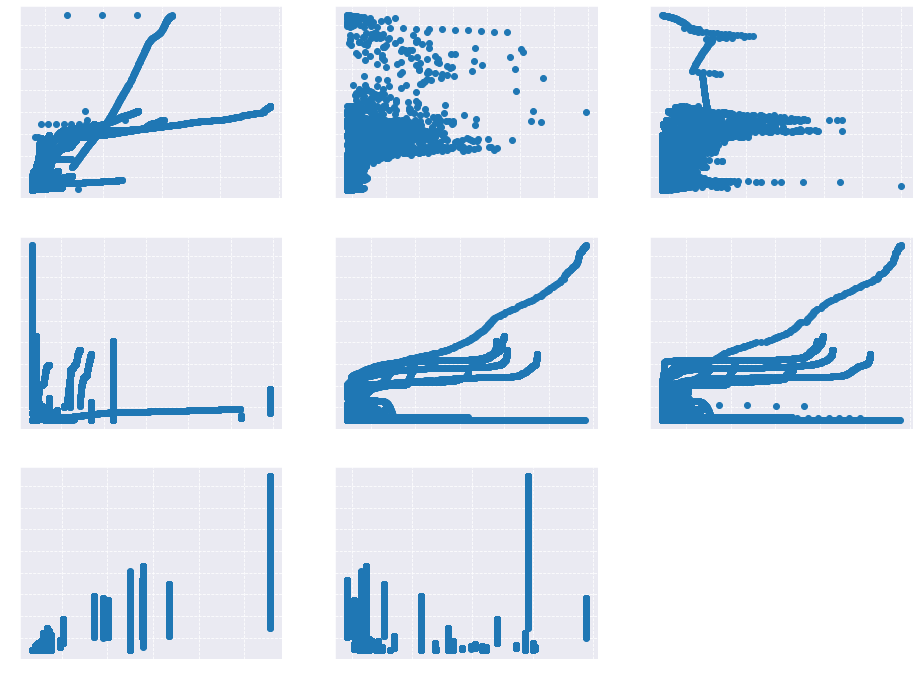

In [134]:
# Set the variable X to be all our input columns
X = covid_df[covid_features]

# set y to be our output column: Total Deaths
y = covid_df.total_deaths


# plt.subplot enables us to plot mutliple graphs
# we produce scatter plots for Total Deaths against each of our input variables
f, ax = plt.subplots(figsize=(16, 12))

plt.subplot(3,3,1)
plt.scatter(X['total_tests'],y)
plt.subplot(3,3,2)
plt.scatter(X['new_vaccinations'],y)
plt.subplot(3,3,3)
plt.scatter(X['new_tests'],y)
plt.subplot(3,3,4)
plt.scatter(X['extreme_poverty'],y)
plt.subplot(3,3,5)
plt.scatter(X['people_vaccinated'],y)
plt.subplot(3,3,6)
plt.scatter(X['people_fully_vaccinated'],y)
plt.subplot(3,3,7)
plt.scatter(X['population'],y)
plt.subplot(3,3,8)
plt.scatter(X['cardiovasc_death_rate'],y)

In [135]:
mlr_model = LinearRegression()
mlr_model.fit(X, y)

LinearRegression()

Text(0.5, 0, 'total_deaths')

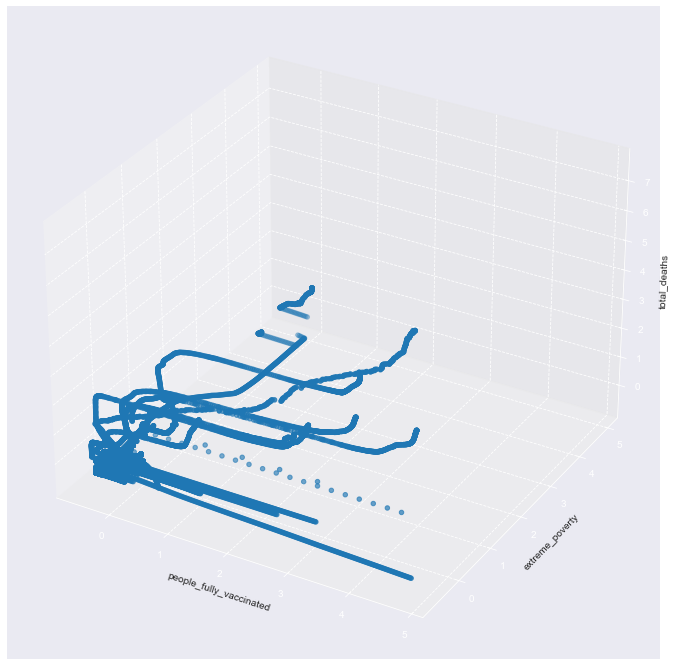

In [136]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

x1 = X["people_fully_vaccinated"]
x2 = X["extreme_poverty"]

ax.scatter(x1, x2, y, marker='o')

# Set axis labels
ax.set_xlabel('people_fully_vaccinated')
ax.set_ylabel('extreme_poverty')
ax.set_zlabel('total_deaths')

Text(0.5, 0, 'total_deaths')

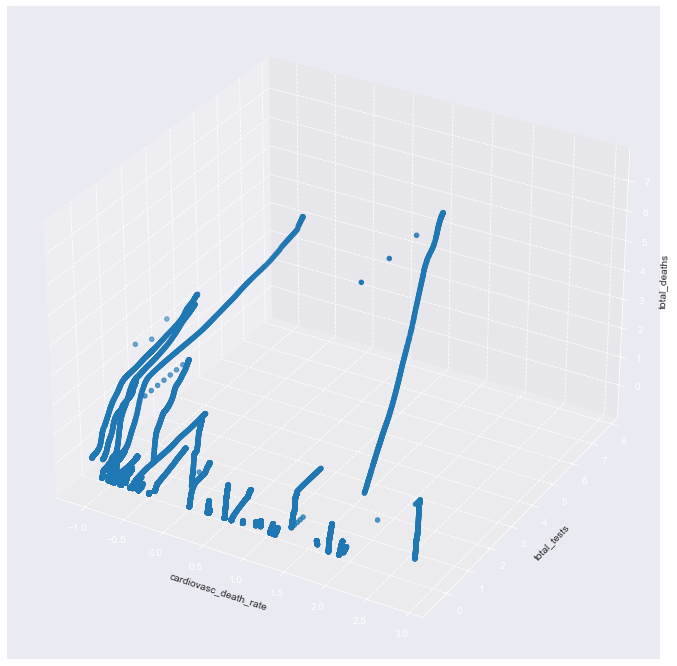

In [137]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

x1 = X["cardiovasc_death_rate"]
x2 = X["total_tests"]

ax.scatter(x1, x2, y, marker='o')

# Set axis labels
ax.set_xlabel('cardiovasc_death_rate')
ax.set_ylabel('total_tests')
ax.set_zlabel('total_deaths')

In [138]:
#theta0 = mlr_model.intercept_
#theta1, theta2 = mlr_model.coef_
#theta0, theta1, theta2

In [139]:
#y_pred = mlr_model.predict([[15, 21]])
#y_pred

In [140]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           total_deaths   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                 1.393e+04
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:19:09   Log-Likelihood:                -7934.3
No. Observations:               25557   AIC:                         1.590e+04
Df Residuals:                   25541   BIC:                         1.603e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5

# Linear Regression 2

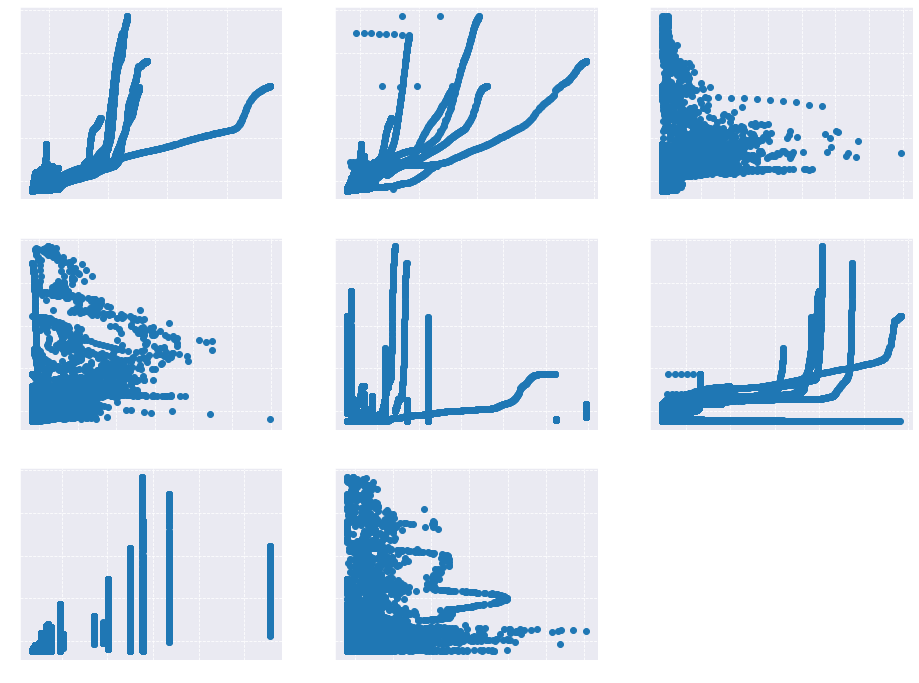

In [141]:
# Set the variable X to be all our input columns
X = covid_mr

# set y to be our output column: Total Deaths
y = covid_df.total_cases


# plt.subplot enables us to plot mutliple graphs
# we produce scatter plots for Total Deaths against each of our input variables
fig = plt.figure(figsize=(16, 12))

plt.subplot(3,3,1)
plt.scatter(X['total_deaths'],y)
plt.subplot(3,3,2)
plt.scatter(X['total_tests'],y)
plt.subplot(3,3,3)
plt.scatter(X['new_vaccinations'],y)
plt.subplot(3,3,4)
plt.scatter(X['new_tests'],y)
plt.subplot(3,3,5)
plt.scatter(X['extreme_poverty'],y)
plt.subplot(3,3,6)
plt.scatter(X['people_vaccinated'],y)
plt.subplot(3,3,7)
plt.scatter(X['population'],y)
plt.subplot(3,3,8)
plt.scatter(X['new_deaths'],y)

plt.savefig('ml1.png', transparent=True)

In [142]:
mlr_model = LinearRegression()
mlr_model.fit(X, y)

LinearRegression()

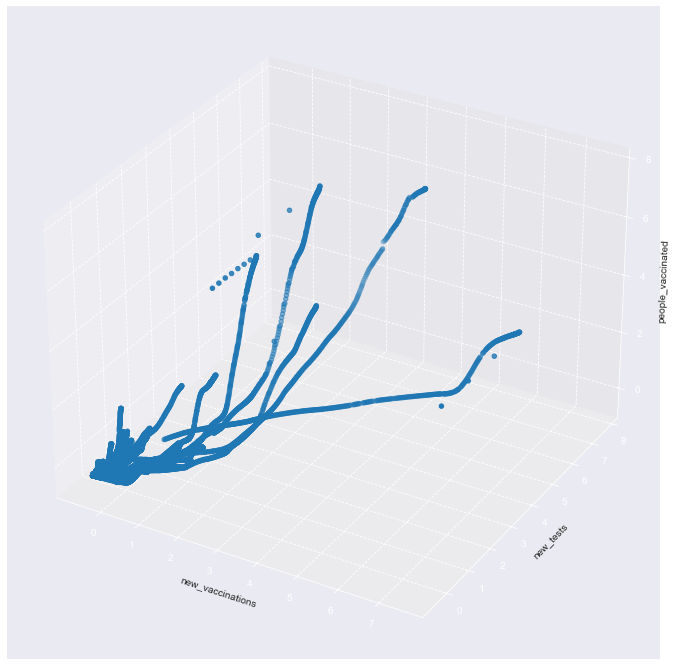

In [143]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

x1 = X["total_deaths"]
x2 = X["total_tests"]

ax.scatter(x1, x2, y, marker='o')

# Set axis labels
ax.set_xlabel('new_vaccinations')
ax.set_ylabel('new_tests')
ax.set_zlabel('people_vaccinated')

plt.savefig('ml2.png', transparent=True)

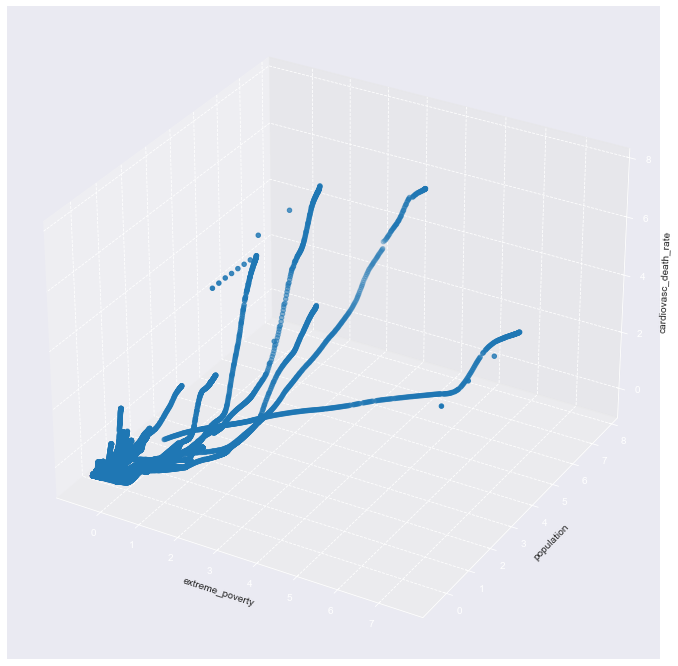

In [144]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

x1 = X["total_deaths"]
x2 = X["total_tests"]

ax.scatter(x1, x2, y, marker='o')

# Set axis labels
ax.set_xlabel('extreme_poverty')
ax.set_ylabel('population')
ax.set_zlabel('cardiovasc_death_rate')

plt.savefig('ml3.png', transparent=True)

In [145]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            total_cases   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                 1.139e+04
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:19:13   Log-Likelihood:                -14576.
No. Observations:               25557   AIC:                         2.917e+04
Df Residuals:                   25546   BIC:                         2.926e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2